# Assignment 4: Unsupervised Learning (Clustering and Recommendations)
- Group Number: A-129
- Name: Uzair Mohiuddin
- Student Number: 8737165

## Introduction
The objective of this notebook is to explore concepts of Unsupervised Learning and Recommendation systems by implementing machine learning and data analysis techniques. This notebook is structured around four main studies:
1. **Study 1**: Testing various similarity measures on movie metadata.
2. **Study 2**: Applying and comparing clustering algorithms (KMeans and DBSCAN).
3. **Study 3**: Building a content-based recommendation system using domain-informed heuristics.
4. **Study 4**: Implementing a collaborative filtering recommendation system using matrix factorization, and evaluating its performance both quantitatively and qualitatively. 

## Dataset Description: Amazon apparels data review
- **Dataset**: Amazon apparels data review
- **Author**: Theken Jin
- **Source**: [Kaggle](https://www.kaggle.com/datasets/thekenjin/amazonapparelsdata)
- **Purpose**: Online E-commerce websites use different recommendations models to provide suggestions to users. Amazon uses item-to-item collaborative filtering. This dataset has apparel review data to build a recommendation model for electronic products.

### Table 1: Amazon Clothing Info
- **Shape**: 28395 rows x 19 columns
- **Features of Dataset**: Amazon Clothing Information
  | Feature | Categorical/Numerical | 
  | ------- | --------------------- |
  | age     | Categorical (object)  | 
  | asin     | Categorical (object)  | 
  | product_type_name     | Categorical (object)  | 
  | formatted_price     | Categorical (object)  | 
  | author     | Categorical (object)  | 
  | color     | Categorical (object)  | 
  | brand     | Categorical (object)  | 
  | publisher     | Categorical (object)  | 
  | availability     | Categorical (object)  | 
  | reviews     | Categorical (object)  | 
  | large_image_url     | Categorical (object)  | 
  | availability_type     | Categorical (object)  | 
  | small_image_url     | Categorical (object)  | 
  | editorial_review     | Categorical (object)  | 
  | title     | Categorical (object)  | 
  | model     | Categorical (object)  | 
  | medium_image_url     | Categorical (object)  | 
  | manufacturer     | Categorical (object)  | 
  | editorial_reivew     | Categorical (object)  | 

### Table 2: Clothing Reviews
- **Shape**: 50046 rows x 6 columns
- **Features of Dataset**: Clothing Reviews
  | Feature | Categorical/Numerical | 
  | ------- | --------------------- |
  | asin     | Categorical (object)  | 
  | title     | Categorical (object)  | 
  | review_userId     | Categorical (object)  | 
  | review_score     | Numerical (int64)  | 
  | review_summary     | Categorical (object)  | 
  | review_text     | Categorical (object)  | 

In [52]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from IPython.display import display, Markdown
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean, hamming
from sklearn.feature_extraction.text import CountVectorizer
from difflib import SequenceMatcher
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import mean_squared_error
from scipy.sparse.linalg import svds

In [2]:
# URL for dataset
amazon_clothing_info_dataset_url = "https://raw.githubusercontent.com/uzaaaiiir/jupyter/refs/heads/main/intro_ds_assignments/assignment4/Amazon-clothing-info.csv"
clothing_reviews_dataset_url = "https://raw.githubusercontent.com/uzaaaiiir/jupyter/refs/heads/main/intro_ds_assignments/assignment4/Clothing-Reviews.csv"

# Load dataset
df_info = pd.read_csv(amazon_clothing_info_dataset_url)
df_reviews = pd.read_csv(clothing_reviews_dataset_url)

In [3]:
# Shape of dataset
df_info.shape

(28395, 19)

In [4]:
df_reviews.shape

(50046, 6)

In [5]:
# Get list of features and descriptions
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28395 entries, 0 to 28394
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sku                134 non-null    object
 1   asin               28395 non-null  object
 2   product_type_name  28395 non-null  object
 3   formatted_price    28395 non-null  object
 4   author             1 non-null      object
 5   color              28385 non-null  object
 6   brand              28302 non-null  object
 7   publisher          8341 non-null   object
 8   availability       24532 non-null  object
 9   reviews            28395 non-null  object
 10  large_image_url    28395 non-null  object
 11  availability_type  24559 non-null  object
 12  small_image_url    28395 non-null  object
 13  editorial_review   441 non-null    object
 14  title              28395 non-null  object
 15  model              8282 non-null   object
 16  medium_image_url   28395 non-null  objec

In [6]:
# Get list of features and descriptions
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50046 entries, 0 to 50045
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   asin            50046 non-null  object
 1   title           50046 non-null  object
 2   review_userId   50046 non-null  object
 3   review_score    50046 non-null  int64 
 4   review_summary  47154 non-null  object
 5   review_text     50046 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.3+ MB


In [7]:
'''
describe() to retrieve numerical attributes.

Numerical attributes: None
'''
df_info.describe()

,sku,asin,product_type_name,formatted_price,author,color,brand,publisher,availability,reviews,large_image_url,availability_type,small_image_url,editorial_review,title,model,medium_image_url,manufacturer,editorial_reivew
count,134,28395,28395,28395,1,28385,28302,8341,24532,28395,28395,24559,28395,441,28395,8282,28395,8341,25554
unique,134,28395,57,3135,1,4527,3640,1216,15,28395,19865,3,19865,225,26069,6477,19865,1216,14252
top,HT-2001_Lime-1149-XL,B074L8FVTT,SHIRT,$19.99,By (author) Gooseberry Patch,Black,TOOGOO(R),Reiss,Usually ships in 1-2 business days,"[False, 'https://www.amazon.com/reviews/iframe...",https://images-na.ssl-images-amazon.com/images...,now,https://images-na.ssl-images-amazon.com/images...,Technical three-season synthetic sleeping bag ...,FINEJO Casual Women Long Sleeve Lace Irregular...,3537,https://images-na.ssl-images-amazon.com/images...,Reiss,Officially Licensed Merchandise. Comes with a ...
freq,1,1,21513,945,1,5181,177,125,12252,1,21,24525,21,31,47,58,21,125,308


In [8]:
'''
Categorical attributes of the dataset.

Categorical attributes are: All are categorical
'''
df_info.describe(include="object")

,sku,asin,product_type_name,formatted_price,author,color,brand,publisher,availability,reviews,large_image_url,availability_type,small_image_url,editorial_review,title,model,medium_image_url,manufacturer,editorial_reivew
count,134,28395,28395,28395,1,28385,28302,8341,24532,28395,28395,24559,28395,441,28395,8282,28395,8341,25554
unique,134,28395,57,3135,1,4527,3640,1216,15,28395,19865,3,19865,225,26069,6477,19865,1216,14252
top,HT-2001_Lime-1149-XL,B074L8FVTT,SHIRT,$19.99,By (author) Gooseberry Patch,Black,TOOGOO(R),Reiss,Usually ships in 1-2 business days,"[False, 'https://www.amazon.com/reviews/iframe...",https://images-na.ssl-images-amazon.com/images...,now,https://images-na.ssl-images-amazon.com/images...,Technical three-season synthetic sleeping bag ...,FINEJO Casual Women Long Sleeve Lace Irregular...,3537,https://images-na.ssl-images-amazon.com/images...,Reiss,Officially Licensed Merchandise. Comes with a ...
freq,1,1,21513,945,1,5181,177,125,12252,1,21,24525,21,31,47,58,21,125,308


In [9]:
# Numerical: review_score
df_reviews.describe()

,review_score
count,50046.000000
mean,4.121648
std,1.290461
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [10]:
# Categorical: asin, title, review_userId, review_summary, review_text
df_reviews.describe(include="object")

,asin,title,review_userId,review_summary,review_text
count,50046,50046,50046,47154,50046
unique,6584,6584,6670,36048,49959
top,B071NS6YRQ,"OUBAO Womens Strapless Sexy Print Top (XL, Blue)",A1WFD3B0ULHZ7E,Perfect,I loved my first trager backpack. After many y...
freq,791,791,100,133,4


# Prepare the Data
We will clean the data and prepare it for the studies. In particular, we will do the following:
- Check for missing values.
- Visualize the distribution of review scores.
- Analyze the mot common product types.
- Handle missing values by dropping or filling them.
- Perform outlier detection.
- Feature engineering to create new features. 

In [11]:
'''
Check for missing values.
- In each data set, there are several misssing values.
  - For the clothing info dataset, many categories have missing data.
  - For the clothing review dataset, review_summary has missing values.
'''
print("Clothing Info Dataset:")
print(df_info.isnull().sum())
print("\nClothing Reviews Dataset:")
print(df_reviews.isnull().sum())

Clothing Info Dataset:
sku                  28261
asin                     0
product_type_name        0
formatted_price          0
author               28394
color                   10
brand                   93
publisher            20054
availability          3863
reviews                  0
large_image_url          0
availability_type     3836
small_image_url          0
editorial_review     27954
title                    0
model                20113
medium_image_url         0
manufacturer         20054
editorial_reivew      2841
dtype: int64

Clothing Reviews Dataset:
asin                 0
title                0
review_userId        0
review_score         0
review_summary    2892
review_text          0
dtype: int64


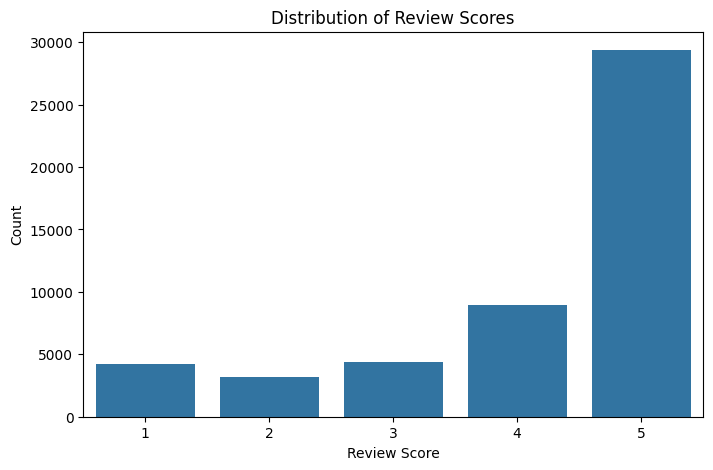

In [12]:
'''
Distribution of review scores: 
- Most items have a score of 5.
'''
plt.figure(figsize=(8, 5))
sns.countplot(data=df_reviews, x="review_score")
plt.title("Distribution of Review Scores")
plt.xlabel("Review Score")
plt.ylabel("Count")
plt.show()

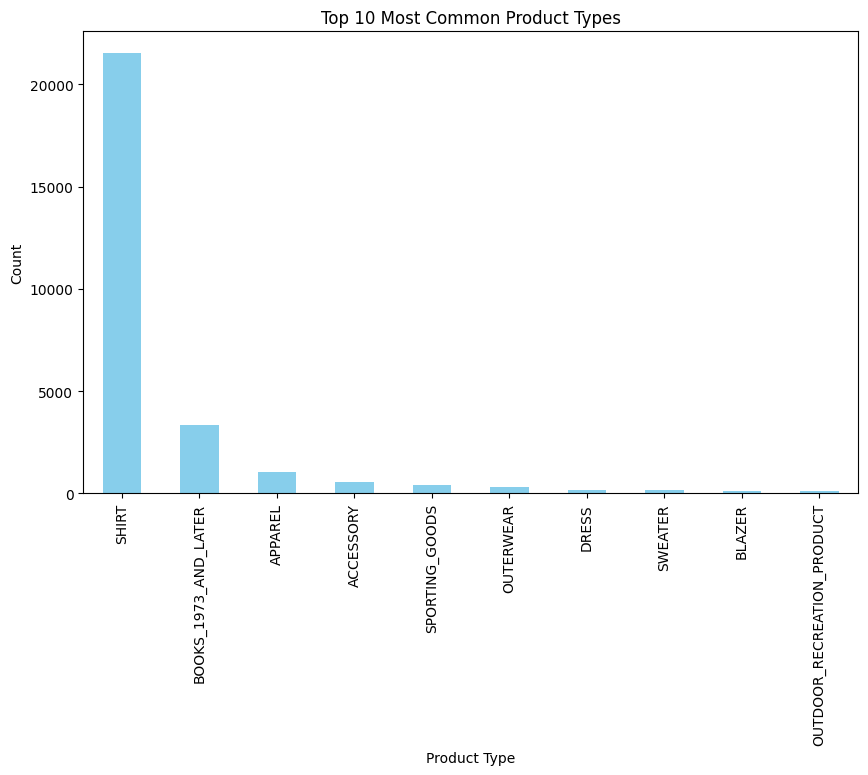

In [13]:
'''
Analyze most common types of products.
- Shirt is must more common than any other product type.
'''

plt.figure(figsize=(10, 6))
df_info["product_type_name"].value_counts().head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 Most Common Product Types")
plt.xlabel("Product Type")
plt.ylabel("Count")
plt.show()

In [14]:
'''
Default value imputation: Fill missing categorical values with Unknown.
'''
df_info["brand"] = df_info["brand"].fillna("Unknown")
df_info["color"] = df_info["color"].fillna("Unkown")
print(df_info.isnull().sum())

# Preprocess the 'formatted_price' column to remove '$' and convert to float
df_info["formatted_price"] = (
    df_info["formatted_price"]
    .str.replace(r"[^0-9.]", "", regex=True)  # Remove non-numeric characters
    .replace("", 0)  # Replace empty strings with NaN
    .astype(float)  # Convert to float
)

sku                  28261
asin                     0
product_type_name        0
formatted_price          0
author               28394
color                    0
brand                    0
publisher            20054
availability          3863
reviews                  0
large_image_url          0
availability_type     3836
small_image_url          0
editorial_review     27954
title                    0
model                20113
medium_image_url         0
manufacturer         20054
editorial_reivew      2841
dtype: int64


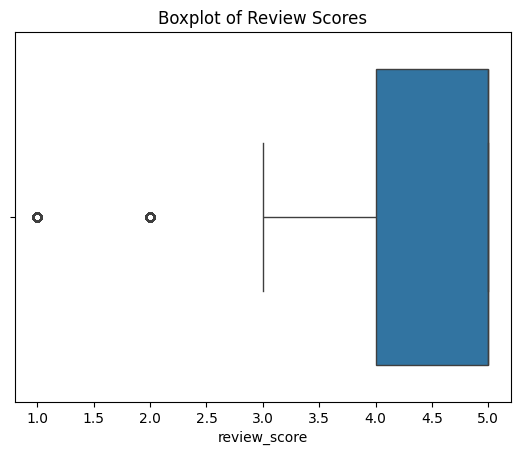

In [15]:
'''
Outlier detection
'''
sns.boxplot(data=df_reviews, x="review_score")
plt.title("Boxplot of Review Scores")
plt.show() 

In [16]:
'''
Create new feature: review_length
'''
df_reviews["review_length"] = df_reviews["review_text"].apply(lambda x: len(str(x)))

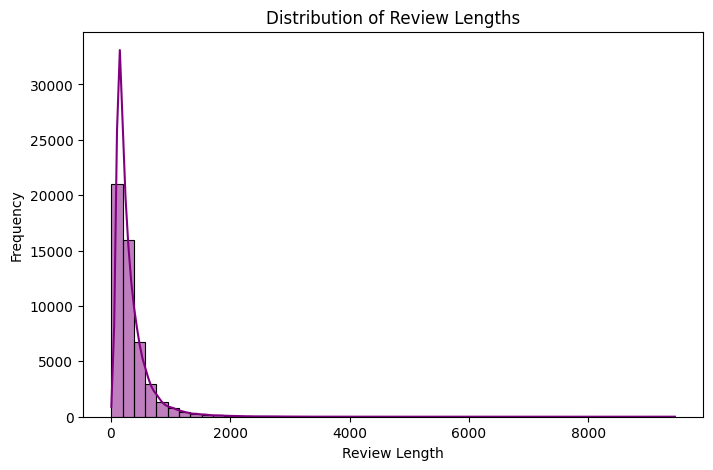

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(df_reviews["review_length"], bins=50, kde=True, color="purple")
plt.title("Distribution of Review Lengths")
plt.xlabel("Review Length")
plt.ylabel("Frequency")
plt.show()

# Study 1: Similarity Measures
We will pick the following 5 attributes:
1. `product_type_name`
2. `formatted_price`
3. `color`
4. `brand`
5. `title`

We will perform the following similarity measures:
- Jaccard Similarity: For `product_type_name` and `color`
- Cosine Similarity: For `formatted_price`
- Euclidean Distance: For `formatted_price`
- Hamming Distance: For `brand`
- Edit Distance: For `title`

In [18]:
def jaccard_similarity(set1, set2):
    return len(set1.intersection(set2)) / len(set1.union(set2))

def cosine_similarity_numerical(values1, values2):
    return cosine_similarity([values1], [values2])[0][0]

def edit_distance(str1, str2):
    return SequenceMatcher(None, str1, str2).ratio()

# Example: Compute similarity for a single attribute
def compute_similarity(attribute, value, top_n=10):
    if attribute == "product_type_name":
        # Jaccard Similarity
        target_set = set(value.split())
        df_info["similarity"] = df_info["product_type_name"].apply(
            lambda x: jaccard_similarity(target_set, set(str(x).split()))
        )
    elif attribute == "formatted_price":
        # Cosine Similarity
        target_value = np.array([float(value)])
        df_info["similarity"] = df_info["formatted_price"].apply(
            lambda x: cosine_similarity_numerical(target_value, np.array([float(x)]))
        )
    elif attribute == "title":
        # Edit Distance
        df_info["similarity"] = df_info["title"].apply(
            lambda x: edit_distance(value, str(x))
        )
    # Sort by similarity and return top N results
    return df_info.sort_values(by="similarity", ascending=False).head(top_n)

In [19]:
requests = [
    {"attribute": "product_type_name", "value": "Shirt"},
    {"attribute": "formatted_price", "value": "20.00"},
    {"attribute": "color", "value": "Red"},
    {"attribute": "brand", "value": "FeatherLite"},
    {"attribute": "title", "value": "Casual Shirt"}
]

# Process each request and display results
for request in requests:
    print(f"Top 10 results for {request['attribute']} similar to '{request['value']}':")
    results = compute_similarity(request["attribute"], request["value"])
    display(results[["title", "product_type_name", "formatted_price", "color", "brand", "similarity"]])

Top 10 results for product_type_name similar to 'Shirt':


,title,product_type_name,formatted_price,color,brand,similarity
28394,Susana Monaco Womens Susana Monoco Sleeveless ...,SHIRT,44.99,Rose,susana monaco,0.0
0,Featherlite Ladies' Long Sleeve Stain Resistan...,SHIRT,26.26,Onyx Black/ Stone,FeatherLite,0.0
1,Women's Unique 100% Cotton T - Special Olympic...,SHIRT,9.99,White,HX-Kingdom Fashion T-shirts,0.0
2,Ladies Cotton Tank 2x1 Ribbed Tank Top,SHIRT,11.99,Black,Fitness Etc.,0.0
3,FeatherLite Ladies' Moisture Free Mesh Sport S...,SHIRT,20.54,White,FeatherLite,0.0
4,Supernatural Chibis Sam Dean And Castiel Short...,SHIRT,7.50,Purple,FNC7C,0.0
5,Supernatural Chibis Sam Dean And Castiel O Nec...,SHIRT,7.39,Purple,FNC7C,0.0
6,Featherlite Ladies' Silky Smooth Pique (White)...,APPAREL,13.53,White,FeatherLite,0.0
7,Fifth Degree Womens Gold Foil Graphic Tees Jun...,SHIRT,6.95,Black,Fifth Degree,0.0
8,Ladies Green Seamless Ribbed Diamond Patterned...,SHIRT,7.90,Green,FineBrandShop,0.0


Top 10 results for formatted_price similar to '20.00':


,title,product_type_name,formatted_price,color,brand,similarity
28394,Susana Monaco Womens Susana Monoco Sleeveless ...,SHIRT,44.99,Rose,susana monaco,1.0
0,Featherlite Ladies' Long Sleeve Stain Resistan...,SHIRT,26.26,Onyx Black/ Stone,FeatherLite,1.0
1,Women's Unique 100% Cotton T - Special Olympic...,SHIRT,9.99,White,HX-Kingdom Fashion T-shirts,1.0
2,Ladies Cotton Tank 2x1 Ribbed Tank Top,SHIRT,11.99,Black,Fitness Etc.,1.0
3,FeatherLite Ladies' Moisture Free Mesh Sport S...,SHIRT,20.54,White,FeatherLite,1.0
4,Supernatural Chibis Sam Dean And Castiel Short...,SHIRT,7.50,Purple,FNC7C,1.0
5,Supernatural Chibis Sam Dean And Castiel O Nec...,SHIRT,7.39,Purple,FNC7C,1.0
6,Featherlite Ladies' Silky Smooth Pique (White)...,APPAREL,13.53,White,FeatherLite,1.0
7,Fifth Degree Womens Gold Foil Graphic Tees Jun...,SHIRT,6.95,Black,Fifth Degree,1.0
8,Ladies Green Seamless Ribbed Diamond Patterned...,SHIRT,7.90,Green,FineBrandShop,1.0


Top 10 results for color similar to 'Red':


,title,product_type_name,formatted_price,color,brand,similarity
28394,Susana Monaco Womens Susana Monoco Sleeveless ...,SHIRT,44.99,Rose,susana monaco,1.0
0,Featherlite Ladies' Long Sleeve Stain Resistan...,SHIRT,26.26,Onyx Black/ Stone,FeatherLite,1.0
1,Women's Unique 100% Cotton T - Special Olympic...,SHIRT,9.99,White,HX-Kingdom Fashion T-shirts,1.0
2,Ladies Cotton Tank 2x1 Ribbed Tank Top,SHIRT,11.99,Black,Fitness Etc.,1.0
3,FeatherLite Ladies' Moisture Free Mesh Sport S...,SHIRT,20.54,White,FeatherLite,1.0
4,Supernatural Chibis Sam Dean And Castiel Short...,SHIRT,7.50,Purple,FNC7C,1.0
5,Supernatural Chibis Sam Dean And Castiel O Nec...,SHIRT,7.39,Purple,FNC7C,1.0
6,Featherlite Ladies' Silky Smooth Pique (White)...,APPAREL,13.53,White,FeatherLite,1.0
7,Fifth Degree Womens Gold Foil Graphic Tees Jun...,SHIRT,6.95,Black,Fifth Degree,1.0
8,Ladies Green Seamless Ribbed Diamond Patterned...,SHIRT,7.90,Green,FineBrandShop,1.0


Top 10 results for brand similar to 'FeatherLite':


,title,product_type_name,formatted_price,color,brand,similarity
28394,Susana Monaco Womens Susana Monoco Sleeveless ...,SHIRT,44.99,Rose,susana monaco,1.0
0,Featherlite Ladies' Long Sleeve Stain Resistan...,SHIRT,26.26,Onyx Black/ Stone,FeatherLite,1.0
1,Women's Unique 100% Cotton T - Special Olympic...,SHIRT,9.99,White,HX-Kingdom Fashion T-shirts,1.0
2,Ladies Cotton Tank 2x1 Ribbed Tank Top,SHIRT,11.99,Black,Fitness Etc.,1.0
3,FeatherLite Ladies' Moisture Free Mesh Sport S...,SHIRT,20.54,White,FeatherLite,1.0
4,Supernatural Chibis Sam Dean And Castiel Short...,SHIRT,7.50,Purple,FNC7C,1.0
5,Supernatural Chibis Sam Dean And Castiel O Nec...,SHIRT,7.39,Purple,FNC7C,1.0
6,Featherlite Ladies' Silky Smooth Pique (White)...,APPAREL,13.53,White,FeatherLite,1.0
7,Fifth Degree Womens Gold Foil Graphic Tees Jun...,SHIRT,6.95,Black,Fifth Degree,1.0
8,Ladies Green Seamless Ribbed Diamond Patterned...,SHIRT,7.90,Green,FineBrandShop,1.0


Top 10 results for title similar to 'Casual Shirt':


,title,product_type_name,formatted_price,color,brand,similarity
15856,Mesh Shirt,SHIRT,350.00,White,Wolford,0.636364
20245,Mesh Shirt,SHIRT,350.00,Black,Wolford,0.636364
21017,Mesh Shirt,SHIRT,350.00,White,Wolford,0.636364
24208,Mesh Shirt,SHIRT,350.00,Black,Wolford,0.636364
16489,Mesh Shirt,SHIRT,350.00,Black,Wolford,0.636364
23547,Mesh Shirt,SHIRT,350.00,White,Wolford,0.636364
19775,Mesh Shirt,SHIRT,350.00,White,Wolford,0.636364
22206,shirts,SHIRT,28.99,Yellow,General,0.555556
17874,shirts,SHIRT,27.99,Red,General,0.555556
16827,shirts,SHIRT,27.99,Red,General,0.555556


# Study 2: Clustering Algorithms
This study will explore two algorithms: KMeans and DBSCAN.
1. We will use a combination of attributes (`formatted_price` vs `review_score` and `formatted_price` vs `review_length`).
2. We will experiment with different parameters for both algorithms
3. We will visualize the results.

In [27]:
# Preprocess
df_reviews = pd.read_csv(clothing_reviews_dataset_url)
df_reviews_copy = df_reviews.copy(deep=True)
df_reviews_copy["formatted_price"] = df_info["formatted_price"]
df_reviews_copy["review_length"] = df_reviews_copy["review_text"].apply(lambda x: len(str(x)))
df_reviews_copy = df_reviews_copy.dropna(subset=["formatted_price", "review_score", "review_length"])

In [28]:
data_1 = df_reviews_copy[["formatted_price", "review_score"]]
data_2 = df_reviews_copy[["formatted_price", "review_length"]]

In [29]:
# Standardize the data
scaler = StandardScaler()
data_1_scaled = scaler.fit_transform(data_1)
data_2_scaled = scaler.fit_transform(data_2)

# Function to visualize clusters
def visualize_clusters(data, labels, title, x_label, y_label):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels, palette="viridis", legend=None)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

KMeans Clustering:


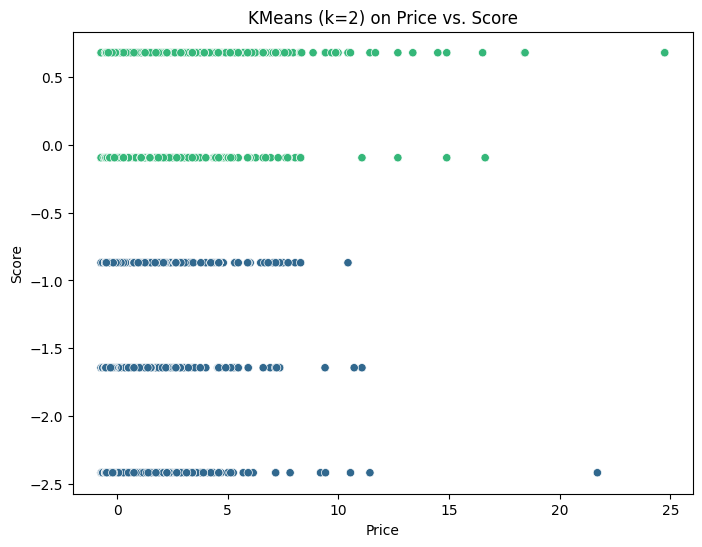

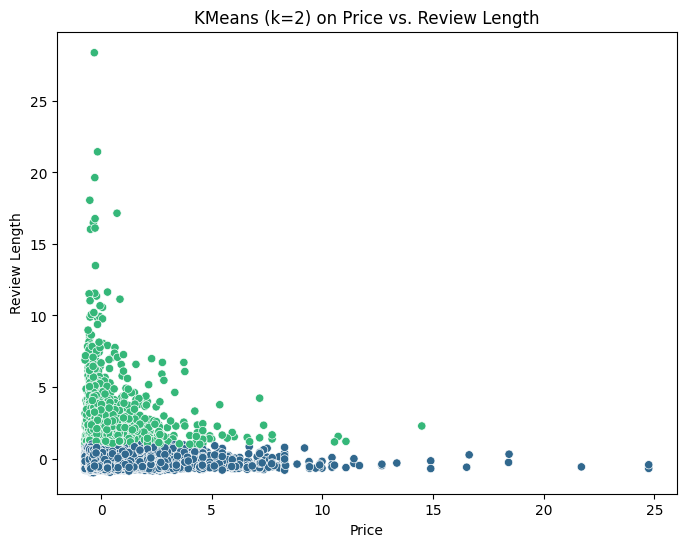

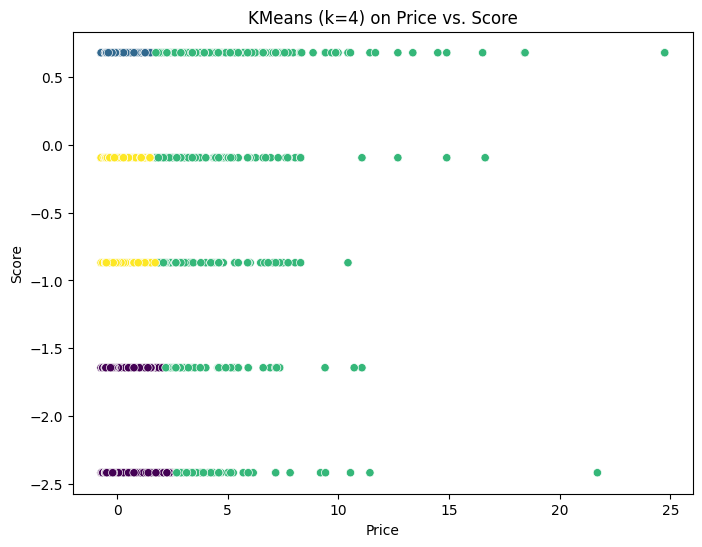

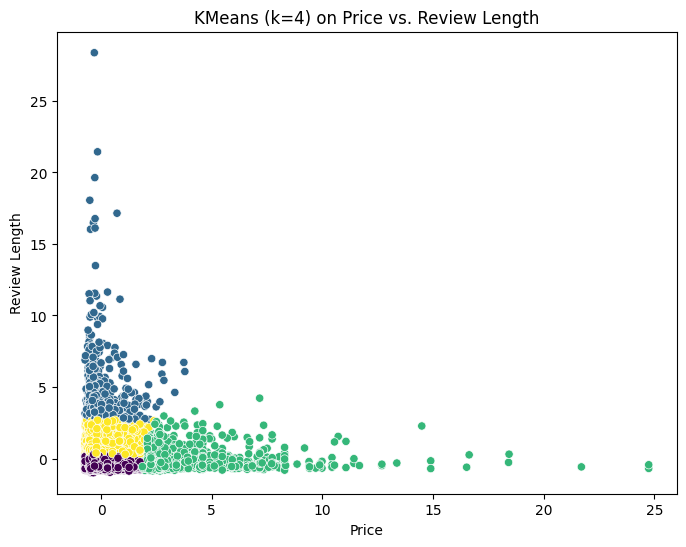

In [30]:
# KMeans Clustering
print("KMeans Clustering:")
for k in [2, 4]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels_1 = kmeans.fit_predict(data_1_scaled)
    labels_2 = kmeans.fit_predict(data_2_scaled)
    
    # Visualize results
    visualize_clusters(data_1_scaled, labels_1, f"KMeans (k={k}) on Price vs. Score", "Price", "Score")
    visualize_clusters(data_2_scaled, labels_2, f"KMeans (k={k}) on Price vs. Review Length", "Price", "Review Length")

DBSCAN Clustering:


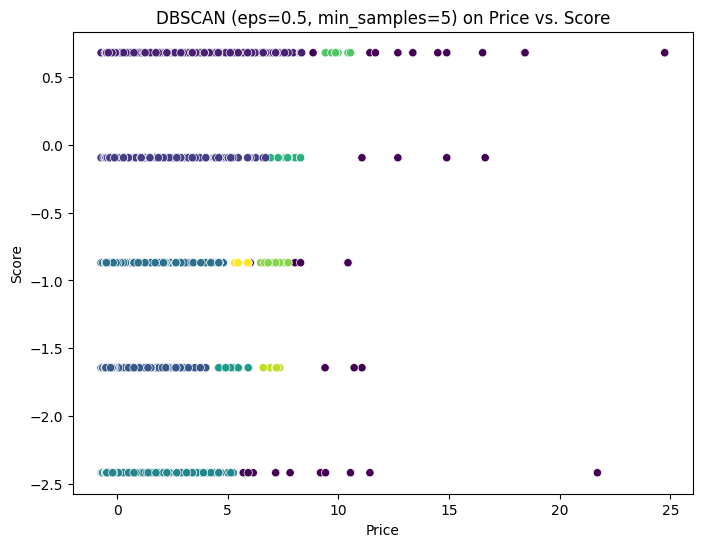

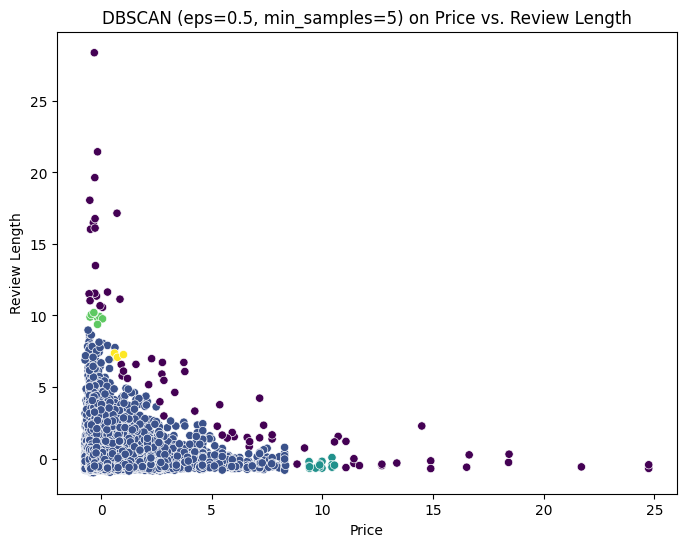

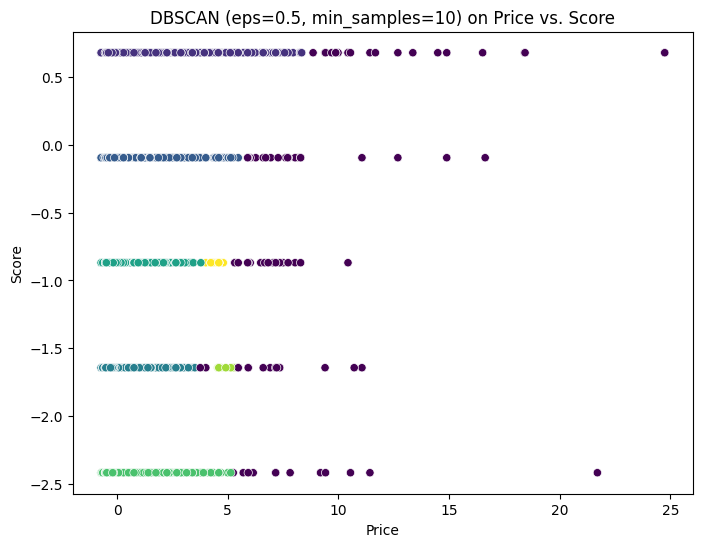

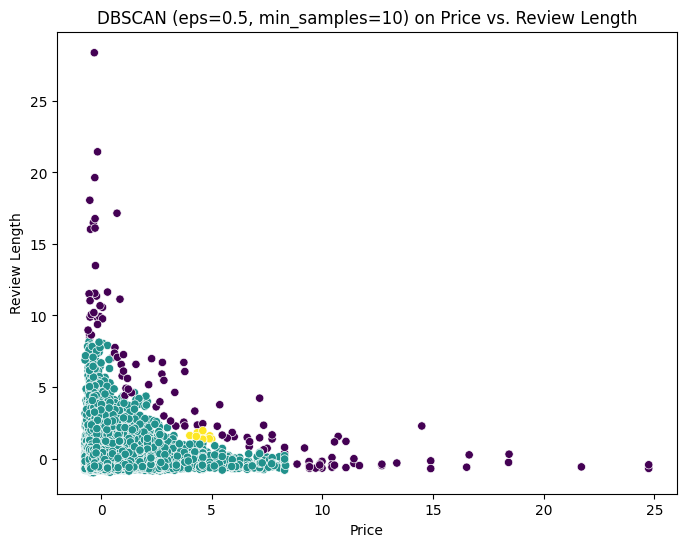

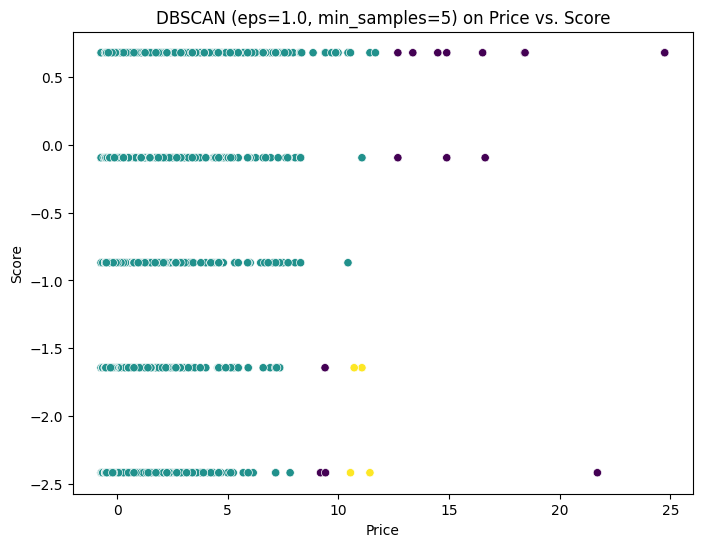

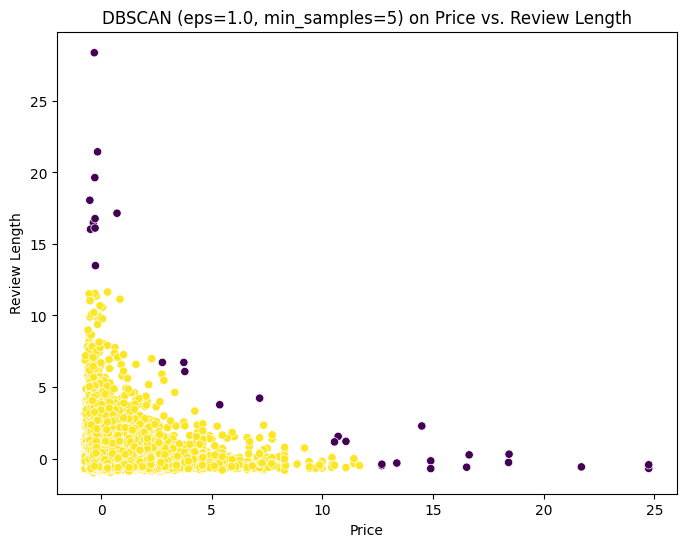

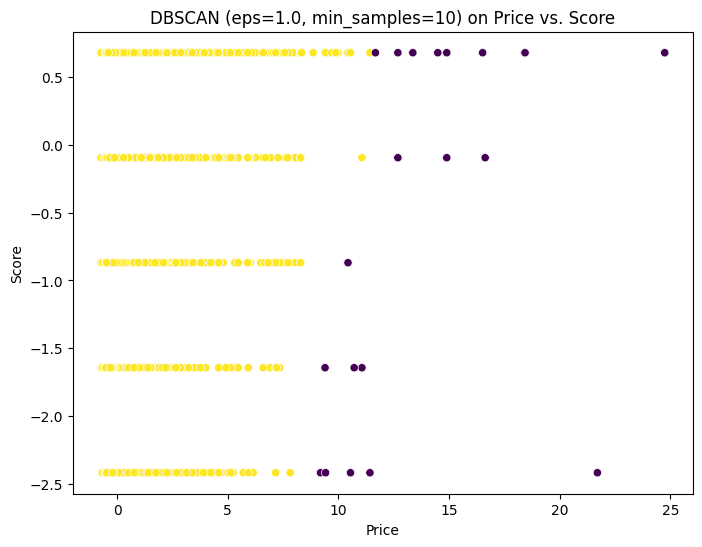

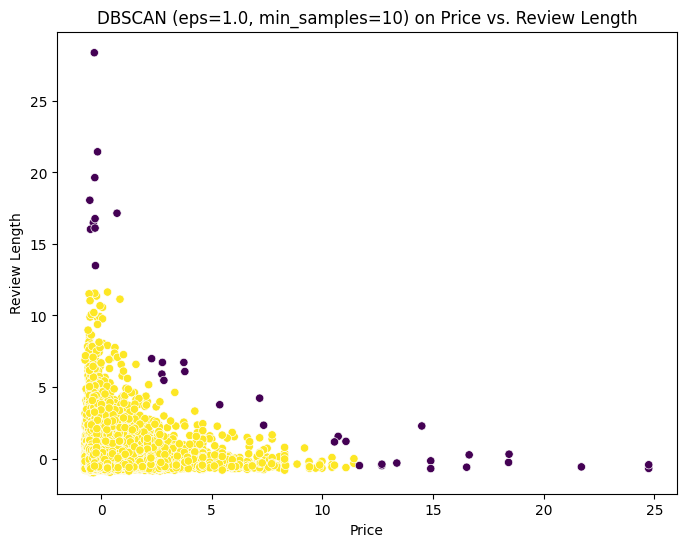

In [31]:
# DBSCAN Clustering
print("DBSCAN Clustering:")
for eps in [0.5, 1.0]:
    for min_samples in [5, 10]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels_1 = dbscan.fit_predict(data_1_scaled)
        labels_2 = dbscan.fit_predict(data_2_scaled)
        
        # Visualize results
        visualize_clusters(data_1_scaled, labels_1, f"DBSCAN (eps={eps}, min_samples={min_samples}) on Price vs. Score", "Price", "Score")
        visualize_clusters(data_2_scaled, labels_2, f"DBSCAN (eps={eps}, min_samples={min_samples}) on Price vs. Review Length", "Price", "Review Length")

# Discussion
The KMeans algorithm seems to produce better clusters than the DBSCAN from visual inspection, although they are very similar. However, KMEans is better suited for the prive vs review length data.

# Study 3: Content-Based Recommendation System
In this study, we will build a content-based recommendaton system using 2 similarity heuristics. These heuristics combine similarity measures to recommend items. The goal is to simulate recommendation requests.

In [34]:
def jaccard_similarity(set1, set2):
    return len(set1.intersection(set2)) / len(set1.union(set2))

def edit_distance(str1, str2):
    return SequenceMatcher(None, str1, str2).ratio()

def euclidean_distance(val1, val2):
    return np.linalg.norm(np.array(val1) - np.array(val2))

# Define two heuristics
def heuristic_1(item, dataset):
    """
    Heuristic 1: Combines Jaccard similarity on 'product_type_name' and 
    Euclidean distance on 'formatted_price'.
    """
    target_type = set(item["product_type_name"].split())
    target_price = float(item["formatted_price"])
    
    dataset["similarity"] = dataset.apply(
        lambda x: 0.5 * jaccard_similarity(target_type, set(str(x["product_type_name"]).split())) +
                  0.5 * (1 / (1 + euclidean_distance(target_price, float(x["formatted_price"])))),
        axis=1
    )
    return dataset.sort_values(by="similarity", ascending=False).head(10)

def heuristic_2(item, dataset):
    """
    Heuristic 2: Combines Edit Distance on 'title' and Cosine similarity on 'review_score'.
    """
    target_title = item["title_x"]
    target_score = np.array([item["review_score"]])
    
    dataset["similarity"] = dataset.apply(
        lambda x: 0.5 * edit_distance(target_title, str(x["title_x"])) +
                  0.5 * cosine_similarity([target_score], [[x["review_score"]]])[0][0],
        axis=1
    )
    return dataset.sort_values(by="similarity", ascending=False).head(10)




In [35]:
# Simulate requests
df_combined = pd.merge(df_info, df_reviews, on="asin")
requests = [
    {"product_type_name": "Shirt", "formatted_price": "20.00", "title_x": "Casual Shirt", "review_score": 4},
    {"product_type_name": "Shoes", "formatted_price": "50.00", "title_x": "Running Shoes", "review_score": 5},
    {"product_type_name": "Dress", "formatted_price": "30.00", "title_x": "Evening Dress", "review_score": 3}
]

for i, request in enumerate(requests):
    print(f"\nRequest {i+1}: {request}")
    print("\nTop 10 Recommendations using Heuristic 1:")
    results_1 = heuristic_1(request, df_combined)
    display(results_1[["title_x", "product_type_name", "formatted_price", "review_score", "similarity"]])
    
    print("\nTop 10 Recommendations using Heuristic 2:")
    results_2 = heuristic_2(request, df_combined)
    display(results_2[["title_x", "product_type_name", "formatted_price", "review_score", "similarity"]])


Request 1: {'product_type_name': 'Shirt', 'formatted_price': '20.00', 'title_x': 'Casual Shirt', 'review_score': 4}

Top 10 Recommendations using Heuristic 1:


,title_x,product_type_name,formatted_price,review_score,similarity
48709,Cthulhu Skull & Tentacles Gothic Womens Black ...,SHIRT,20.0,5,0.5
12563,Samudrika Women's Shirt Cotton Extra Large Blu...,SHIRT,20.0,5,0.5
12564,Samudrika Women's Shirt Cotton Extra Large Blu...,SHIRT,20.0,5,0.5
12565,Samudrika Women's Shirt Cotton Extra Large Blu...,SHIRT,20.0,5,0.5
43958,Samudrika Women's Shirt Cotton Small Light Blu...,SHIRT,20.0,3,0.5
18673,Pinup Girl Black Womens Cami Tank Top Rockabil...,SHIRT,20.0,4,0.5
18674,Pinup Girl Black Womens Cami Tank Top Rockabil...,SHIRT,20.0,5,0.5
18677,Pinup Girl Black Womens Cami Tank Top Rockabil...,SHIRT,20.0,5,0.5
48705,Cthulhu Skull & Tentacles Gothic Womens Black ...,SHIRT,20.0,4,0.5
48706,Cthulhu Skull & Tentacles Gothic Womens Black ...,SHIRT,20.0,5,0.5



Top 10 Recommendations using Heuristic 2:


,title_x,product_type_name,formatted_price,review_score,similarity
19359,James Perse Black Shirt 1,SHIRT,99.99,5,0.743243
19360,James Perse Black Shirt 1,SHIRT,99.99,5,0.743243
19361,James Perse Black Shirt 1,SHIRT,99.99,5,0.743243
19358,James Perse Black Shirt 1,SHIRT,99.99,5,0.743243
19357,James Perse Black Shirt 1,SHIRT,99.99,3,0.743243
19356,James Perse Black Shirt 1,SHIRT,99.99,5,0.743243
19362,James Perse Black Shirt 1,SHIRT,99.99,1,0.743243
18638,Colorful Balloons Casual T-shirt Bky5-010,SHIRT,19.89,4,0.707547
18639,Colorful Balloons Casual T-shirt Bky5-010,SHIRT,19.89,4,0.707547
18631,Colorful Balloons Casual T-shirt Bky5-010,SHIRT,19.89,5,0.707547



Request 2: {'product_type_name': 'Shoes', 'formatted_price': '50.00', 'title_x': 'Running Shoes', 'review_score': 5}

Top 10 Recommendations using Heuristic 1:


,title_x,product_type_name,formatted_price,review_score,similarity
45762,Exotic India Maroon Top from Bareilly with Han...,SHIRT,50.0,5,0.5
48421,Nike Ohio State Buckeyes 2017 Women's Medium P...,SHIRT,50.0,5,0.5
17478,Exotic India Prairie-Sunset Lukhnavi Chikan Ku...,SHIRT,50.0,2,0.5
17479,Exotic India Prairie-Sunset Lukhnavi Chikan Ku...,SHIRT,50.0,5,0.5
33400,Wayf White Junior Striped Square Neck Cropped ...,SHIRT,50.0,5,0.5
17468,Exotic India Prairie-Sunset Lukhnavi Chikan Ku...,SHIRT,50.0,5,0.5
17469,Exotic India Prairie-Sunset Lukhnavi Chikan Ku...,SHIRT,50.0,5,0.5
17470,Exotic India Prairie-Sunset Lukhnavi Chikan Ku...,SHIRT,50.0,5,0.5
17471,Exotic India Prairie-Sunset Lukhnavi Chikan Ku...,SHIRT,50.0,5,0.5
48422,Nike Ohio State Buckeyes 2017 Women's Medium P...,SHIRT,50.0,5,0.5



Top 10 Recommendations using Heuristic 2:


,title_x,product_type_name,formatted_price,review_score,similarity
17300,Women's The Quick Running Fox Tank,BOOKS_1973_AND_LATER,7.45,5,0.691489
17299,Women's The Quick Running Fox Tank,BOOKS_1973_AND_LATER,7.45,5,0.691489
17297,Women's The Quick Running Fox Tank,BOOKS_1973_AND_LATER,7.45,5,0.691489
17298,Women's The Quick Running Fox Tank,BOOKS_1973_AND_LATER,7.45,5,0.691489
12201,"Sundays Slub Knit Tank, Size 3",SHIRT,8.59,5,0.686047
12200,"Sundays Slub Knit Tank, Size 3",SHIRT,8.59,5,0.686047
30402,Hue Solid Short Sleeve Top,SHIRT,24.97,4,0.679487
30401,Hue Solid Short Sleeve Top,SHIRT,24.97,5,0.679487
5857,American Living Poncho Top Size S,SHIRT,15.00,2,0.673913
16945,Ermanno Scervino Green Stretch Blouse T-shirt,SHIRT,167.50,5,0.672414



Request 3: {'product_type_name': 'Dress', 'formatted_price': '30.00', 'title_x': 'Evening Dress', 'review_score': 3}

Top 10 Recommendations using Heuristic 1:


,title_x,product_type_name,formatted_price,review_score,similarity
45637,"Chloe K Plaid Sleeveless Long Tunic Shirt, Nav...",SHIRT,30.0,5,0.5
23121,Womens Cut Off Shoulder Long Sleeve Loose Fit ...,SHIRT,30.0,2,0.5
4861,J. Crew Womens Sequin V-Neck Tank Navy Medium,SHIRT,30.0,5,0.5
45638,"Chloe K Plaid Sleeveless Long Tunic Shirt, Nav...",SHIRT,30.0,5,0.5
45639,"Chloe K Plaid Sleeveless Long Tunic Shirt, Nav...",SHIRT,30.0,5,0.5
4862,J. Crew Womens Sequin V-Neck Tank Navy Medium,SHIRT,30.0,4,0.5
4863,J. Crew Womens Sequin V-Neck Tank Navy Medium,SHIRT,30.0,4,0.5
10096,Outback Red THE LIMITED Striped Sleeveless Blo...,SHIRT,30.0,1,0.5
4848,J. Crew Womens Sequin V-Neck Tank Navy Medium,SHIRT,30.0,4,0.5
4849,J. Crew Womens Sequin V-Neck Tank Navy Medium,SHIRT,30.0,5,0.5



Top 10 Recommendations using Heuristic 2:


,title_x,product_type_name,formatted_price,review_score,similarity
26777,Steve Madden Aztec Print Vest,SHIRT,39.99,2,0.690476
16245,Essential Tunic Dress 3/4 Sleeve Black (XXXL),SHIRT,32.99,5,0.689655
16247,Essential Tunic Dress 3/4 Sleeve Black (XXXL),SHIRT,32.99,4,0.689655
16246,Essential Tunic Dress 3/4 Sleeve Black (XXXL),SHIRT,32.99,5,0.689655
16248,Essential Tunic Dress 3/4 Sleeve Black (XXXL),SHIRT,32.99,3,0.689655
16249,Essential Tunic Dress 3/4 Sleeve Black (XXXL),SHIRT,32.99,4,0.689655
16250,Essential Tunic Dress 3/4 Sleeve Black (XXXL),SHIRT,32.99,5,0.689655
42149,"Cece By Cynthia Steffe Womens A-Line Dress, M",SHIRT,39.99,5,0.672414
42150,"Cece By Cynthia Steffe Womens A-Line Dress, M",SHIRT,39.99,2,0.672414
42151,"Cece By Cynthia Steffe Womens A-Line Dress, M",SHIRT,39.99,2,0.672414


In [36]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28395 entries, 0 to 28394
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sku                134 non-null    object 
 1   asin               28395 non-null  object 
 2   product_type_name  28395 non-null  object 
 3   formatted_price    28395 non-null  float64
 4   author             1 non-null      object 
 5   color              28395 non-null  object 
 6   brand              28395 non-null  object 
 7   publisher          8341 non-null   object 
 8   availability       24532 non-null  object 
 9   reviews            28395 non-null  object 
 10  large_image_url    28395 non-null  object 
 11  availability_type  24559 non-null  object 
 12  small_image_url    28395 non-null  object 
 13  editorial_review   441 non-null    object 
 14  title              28395 non-null  object 
 15  model              8282 non-null   object 
 16  medium_image_url   283

# Results
- For the requesttests:
  - Heuristic 1 results includes more items like Casual shirts and apparel in the similar price range.
  - Heuristic 2 also reports Shirts, but the prices differed due to the review scores. 

# Study 4: Collaborative Filtering Recommendation System
In this study we will program the Recommendation system based on collaborative filtering. 
1. Build a Utility Matrix.
2. Perform matrix factorization to decompose the matrix into matrices P and Q.
3. Simulate 3 recommendation requests.
4. Perform quantitative evaluation by removing 10% of the data and comparing predictions.

In [44]:
reviews = pd.read_csv(clothing_reviews_dataset_url)
utility_matrix = reviews.pivot_table(index='review_userId', columns='asin', values='review_score')

In [46]:
user_counts = reviews['review_userId'].value_counts()
valid_users = user_counts[user_counts > 1].index
filtered_reviews = reviews[reviews['review_userId'].isin(valid_users)]

# Step 2: Now split with stratification
train, test = train_test_split(
    filtered_reviews, 
    test_size=0.1, 
    stratify=filtered_reviews['review_userId'],
    random_state=42
)

In [47]:
train_matrix = train.pivot_table(index='review_userId', columns='asin', values='review_score')

In [48]:
def matrix_factorization(R, K=20, steps=50, alpha=0.002, beta=0.02):
    R = R.fillna(0).values
    N, M = R.shape
    P = np.random.rand(N, K)
    Q = np.random.rand(M, K)

    for step in range(steps):
        for i in range(N):
            for j in range(M):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i, :], Q[j, :].T)
                    for k in range(K):
                        P[i][k] += alpha * (2 * eij * Q[j][k] - beta * P[i][k])
                        Q[j][k] += alpha * (2 * eij * P[i][k] - beta * Q[j][k])
    return P, Q

In [49]:
P, Q = matrix_factorization(train_matrix, K=20, steps=50, alpha=0.002, beta=0.02)
R_pred = np.dot(P, Q.T)

In [50]:
# Map indices to user/item
user_ids = train_matrix.index.tolist()
item_ids = train_matrix.columns.tolist()

# Choose 3 sample users from test
sample_users = test['review_userId'].sample(3, random_state=42).tolist()

for user_id in sample_users:
    user_idx = user_ids.index(user_id)
    user_ratings = train_matrix.loc[user_id]

    # Filter items not rated by user
    unrated_items = user_ratings[user_ratings.isna()].index
    predictions = {item: R_pred[user_idx][item_ids.index(item)] for item in unrated_items if item in item_ids}
    top_items = sorted(predictions.items(), key=lambda x: x[1], reverse=True)[:10]
    
    print(f"Top recommendations for user {user_id}:")
    for asin, score in top_items:
        print(f"  ASIN: {asin}, Predicted Rating: {score:.2f}")


Top recommendations for user AJU5WLLEHPZ3X:
  ASIN: B01MSLI30T, Predicted Rating: 6.49
  ASIN: B06XVYC2CV, Predicted Rating: 6.31
  ASIN: B01CE4GNBO, Predicted Rating: 6.27
  ASIN: B06Y483XPV, Predicted Rating: 6.26
  ASIN: B071J26678, Predicted Rating: 6.24
  ASIN: B01GFVNED2, Predicted Rating: 6.19
  ASIN: B00XO271JO, Predicted Rating: 6.16
  ASIN: B01GCZ8SJ6, Predicted Rating: 6.16
  ASIN: B01AY1280E, Predicted Rating: 6.15
  ASIN: B001BKN05U, Predicted Rating: 6.15
Top recommendations for user A6BI655P0T5LJ:
  ASIN: B01MR7EVG3, Predicted Rating: 6.48
  ASIN: B01MSM57RC, Predicted Rating: 6.47
  ASIN: B00LHBQYYW, Predicted Rating: 6.29
  ASIN: B01AR94SK6, Predicted Rating: 6.23
  ASIN: B0161KUQBK, Predicted Rating: 6.18
  ASIN: B01K4OV9OW, Predicted Rating: 6.18
  ASIN: B01LWLHEJI, Predicted Rating: 6.18
  ASIN: B01L9M4W38, Predicted Rating: 6.16
  ASIN: B014ICE0VK, Predicted Rating: 6.12
  ASIN: B01GCZ8SJ6, Predicted Rating: 6.12
Top recommendations for user A30V9JT83XBLG9:
  ASIN:

In [53]:
actual = []
predicted = []

for _, row in test.iterrows():
    user = row['review_userId']
    item = row['asin']
    rating = row['review_score']

    if user in user_ids and item in item_ids:
        user_idx = user_ids.index(user)
        item_idx = item_ids.index(item)
        actual.append(rating)
        predicted.append(R_pred[user_idx][item_idx])

mse = mean_squared_error(actual, predicted)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 2.2181


In [54]:
# Convert ratings to binary relevance: 1 if score >= 4 else 0
test['relevance'] = test['review_score'].apply(lambda x: 1 if x >= 4 else 0)


In [55]:
def precision_at_k(recommended, relevant, k):
    recommended_at_k = recommended[:k]
    return sum([1 for item in recommended_at_k if item in relevant]) / k

def mean_reciprocal_rank(recommended, relevant):
    for idx, item in enumerate(recommended):
        if item in relevant:
            return 1 / (idx + 1)
    return 0.0


In [56]:
user_ids = train_matrix.index.tolist()
item_ids = train_matrix.columns.tolist()

sample_users = test['review_userId'].sample(3, random_state=42).tolist()

p_at_5_list = []
p_at_10_list = []
mrr_list = []

for user_id in sample_users:
    if user_id not in user_ids:
        continue

    user_idx = user_ids.index(user_id)
    all_user_ratings = train_matrix.loc[user_id]

    # Get items the user hasn't rated in train
    unrated_items = all_user_ratings[all_user_ratings.isna()].index.tolist()
    
    # Predict scores for unrated items
    predictions = {
        item: R_pred[user_idx][item_ids.index(item)]
        for item in unrated_items if item in item_ids
    }

    # Sort items by predicted score
    ranked_items = sorted(predictions.items(), key=lambda x: x[1], reverse=True)
    recommended_items = [item for item, _ in ranked_items]

    # Get relevant items from gold standard
    user_gs = test[(test['review_userId'] == user_id) & (test['asin'].isin(unrated_items))]
    relevant_items = user_gs[user_gs['relevance'] == 1]['asin'].tolist()

    p5 = precision_at_k(recommended_items, relevant_items, 5)
    p10 = precision_at_k(recommended_items, relevant_items, 10)
    mrr = mean_reciprocal_rank(recommended_items, relevant_items)

    print(f"User: {user_id} → P@5: {p5:.2f}, P@10: {p10:.2f}, MRR: {mrr:.2f}")
    
    p_at_5_list.append(p5)
    p_at_10_list.append(p10)
    mrr_list.append(mrr)

# Average scores across users
print("\n--- Overall Evaluation ---")
print(f"Average P@5: {sum(p_at_5_list)/len(p_at_5_list):.2f}")
print(f"Average P@10: {sum(p_at_10_list)/len(p_at_10_list):.2f}")
print(f"Average MRR: {sum(mrr_list)/len(mrr_list):.2f}")


User: AJU5WLLEHPZ3X → P@5: 0.00, P@10: 0.00, MRR: 0.00
User: A6BI655P0T5LJ → P@5: 0.00, P@10: 0.00, MRR: 0.00
User: A30V9JT83XBLG9 → P@5: 0.00, P@10: 0.00, MRR: 0.00

--- Overall Evaluation ---
Average P@5: 0.00
Average P@10: 0.00
Average MRR: 0.00


# References
- ChatGPT:
  - How do we implement a KMeans and DBSCAN clustering algorithm in Python?
  - Show me how a content-based recommendation system would be implemented on a data set?
  - How do we build a utility matrix and perform matrix factorization on a dataset in Python?
- Lecture Notes from Week 8 and 9.